In [1]:
from sklearn.datasets import load_svmlight_file
from io import BytesIO
import numpy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
# load training set and testing set
X_train, y_train = load_svmlight_file("/Users/taozizhuo/Machine Learning/a9a_train", n_features=123)
X_val, y_val = load_svmlight_file("/Users/taozizhuo/Machine Learning/a9a.t", n_features=123)

In [4]:
# preprocess
X_train = X_train.toarray()
X_val = X_val.toarray()
n_samples_train, n_features_train = X_train.shape
n_samples_val, n_features_val = X_val.shape
X_train = numpy.column_stack((X_train, numpy.ones((n_samples_train, 1))))
X_val = numpy.column_stack((X_val, numpy.ones((n_samples_val, 1))))
y_train = y_train.reshape((-1, 1))
y_val = y_val.reshape((-1, 1))
y_train = numpy.where(y_train < 0, 0, 1) # convert {-1,1} to {0,1}
y_val = numpy.where(y_val < 0, 0, 1)

In [5]:
# initialize the parameters
max_epoch = 200
learning_rate = 0.005
batch_size = 100
# initialize w with random numbers
w = numpy.random.random((n_features_train + 1, 1))

losses_train = []
losses_val = []

In [6]:
# calculate probablity
def h(x):
    return 1/(1+numpy.exp(-w.transpose().dot(x.transpose())))


# extract a random batch
random_index = numpy.random.choice(n_samples_train, batch_size, replace=False)
X_train_batch = X_train[random_index, :]
y_train_batch = y_train[random_index, :]

In [7]:
# train
for epoch in range(max_epoch):

    G = (h(X_train_batch)-y_train_batch).dot(X_train_batch) # calculate the gradient
    w -= learning_rate * numpy.average(G) # update w

    y_predict_train = numpy.where(h(X_train) > 0.5, 1, 0) # set a threshold of 0.5
    loss_train_sum = 0
    for i in range(0, n_samples_train): # loss function on training set
        loss_train_sum += y_train[i]*numpy.log(h(X_train[i]))+(1-y_train[i])*numpy.log(1-h(X_train[i]))
    loss_train = -loss_train_sum/X_train.shape[0]
    losses_train.append(loss_train)

    loss_val_sum = 0
    y_predict_val = numpy.where(h(X_val) > 0.5, 1, 0)
    for i in range(0, n_samples_val): # loss function on validation set
        loss_val_sum += y_val[i]*numpy.log(h(X_val[i]))+(1-y_val[i])*numpy.log(1-h(X_val[i]))
    Lvalidation = -loss_val_sum/X_val.shape[0]
    losses_val.append(Lvalidation)

print(Lvalidation)

[0.7414414]


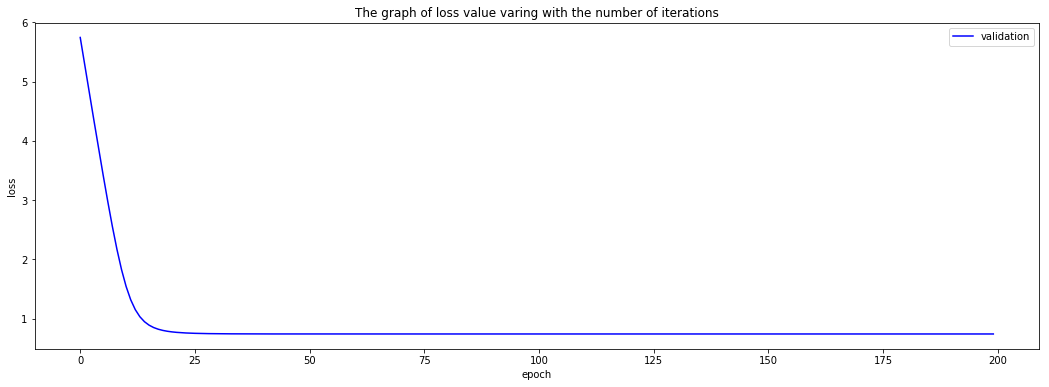

In [8]:
# show in graph
plt.figure(figsize=(18, 6))
# plt.plot(losses_train, color="r", label="train")
plt.plot(losses_val, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")
plt.show()